### **Prerequisite Test - Aravind Krishna 20110021**

Qn1 : How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain

No of multiplications = n.m.k
No of additions = n.m.(k-1)

In each of the elments of n.m elements in the final matrix it is the dot product of row and column vector of dimensions 1 x k and  k x 1 respectively which has k number of multipcations and (k-1) additions.

Qn2 : Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [29]:
import numpy as np
import random as rm
import time as tt
import statistics as st
import jax.numpy as jnp
from jax import grad
import matplotlib.pyplot as plt
import pandas as pd
import sympy as smp

In [30]:


n = 8
k = 10
m = 6

# Initializing matrices a and b
a = [[rm.randint(1, 9) for _ in range(k)] for _ in range(n)]
b = [[rm.randint(1, 9) for _ in range(m)] for _ in range(k)]
c = [[0 for _ in range(m)] for _ in range(n)]

# List method for matrix multiplication
def matrix_multiplication(a, b, c):
    for i in range(len(a)):
        for j in range(len(b[0])):
            for p in range(len(a[0])):
                c[i][j] += a[i][p] * b[p][j]
    return c

# Numpy method for matrix multiplication
def numpy_matrix_multiplication(a, b):
    return np.dot(a, b)

# Measure execution time for both methods
def measure_execution_time(a, b, c):
    time1 = []
    time2 = []
    for _ in range(1000):
        for i in range(n):
            for j in range(m):
              c[i][j] = 0

        t0 = tt.time()
        res1 = matrix_multiplication(a, b, c)
        t1 = tt.time()
        time = (t1 - t0) * 1000000
        time1.append(time)

        t0 = tt.time()
        res2 = numpy_matrix_multiplication(a, b)
        t1 = tt.time()
        time = (t1 - t0) * 1000000
        time2.append(time)

    ti1 = round(sum(time1) / len(time1), 3)
    ti2 = round(sum(time2) / len(time2), 3)
    sd1 = round(st.pstdev(time1), 3)
    sd2 = round(st.pstdev(time2), 3)

    print("List method:", ti1, "+/-", sd1, "microsec")
    print("NumPy method:", ti2, "+/-", sd2, "microsec")

# Perform the measurements
measure_execution_time(a, b, c)


List method: 133.667 +/- 132.949 microsec
NumPy method: 35.739 +/- 50.859 microsec


numpy calculates the multiplications and additions parallelly which makes it much faster.


Qn3 : Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Ans : The method mentioned above results in a time complexity of $O(n^{\lceil \frac{n}{2} \rceil})$

Qn4 : What is the gradient of the following function with respect to x and y?

The gradient of the above function can be written w.r.t x as well as w.r.t y is as follows\
w.r.t x $$2xy + y^3 \cos(x)$$


w.r.t y $$x^2 + 3y^2 \sin(x)$$

Qn 5 : Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [12]:
import jax.numpy as jnp
from jax import grad
import random as rm

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

def fx_manual(x, y):
    return 2 * x * y + y**3 * jnp.cos(x)

def fy_manual(x, y):
    return x**2 + 3 * y**2 * jnp.sin(x)

df_dx = grad(f, argnums=0)
df_dy = grad(f, argnums=1)

for i in range(7):
    x = round(rm.uniform(0.0, 10.0), 2)
    y = round(rm.uniform(0.0, 10.0), 2)
    print(x, y)
    print("wrt x- JAX: ", float(df_dx(x, y)), " manual: ", float(fx_manual(x, y)))
    print("wrt y- JAX: ", float(df_dy(x, y)), " manual: ", float(fy_manual(x, y)))


4.4 7.14
wrt x- JAX:  -49.035400390625  manual:  -49.035400390625
wrt y- JAX:  -126.1768798828125  manual:  -126.1768798828125
2.34 3.36
wrt x- JAX:  -10.660040855407715  manual:  -10.660039901733398
wrt y- JAX:  29.809139251708984  manual:  29.80914306640625
8.93 0.81
wrt x- JAX:  13.998892784118652  manual:  13.998892784118652
wrt y- JAX:  80.67951965332031  manual:  80.67951965332031
1.51 3.83
wrt x- JAX:  14.980149269104004  manual:  14.980149269104004
wrt y- JAX:  46.20549774169922  manual:  46.20549774169922
1.53 2.14
wrt x- JAX:  6.948107719421387  manual:  6.9481072425842285
wrt y- JAX:  16.068269729614258  manual:  16.068267822265625
4.15 3.31
wrt x- JAX:  8.1363525390625  manual:  8.1363525390625
wrt y- JAX:  -10.583545684814453  manual:  -10.583549499511719
4.66 0.62
wrt x- JAX:  5.7659196853637695  manual:  5.7659196853637695
wrt y- JAX:  20.563982009887695  manual:  20.563982009887695


Qn 6 : Use sympy to confirm that you obtain the same gradient analytically.

In [13]:
import sympy as sp

x, y = sp.symbols('x y', real=True)
exp = x**2 * y + y**3 * sp.sin(x)

der_x = sp.diff(exp, x)
der_y = sp.diff(exp, y)
print(der_x)
print(der_y)


2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


Qn 9 :Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

**$y$ $=$ $x$**

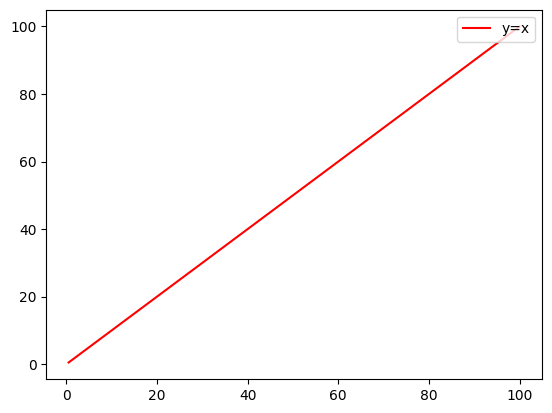

In [15]:
x = np.linspace(0.5,100,200)
y1 = x
plt.plot(x, y1, '-r', label='y=x')
plt.legend(loc='upper right')

plt.show()

$y$ $=$ $x^2$

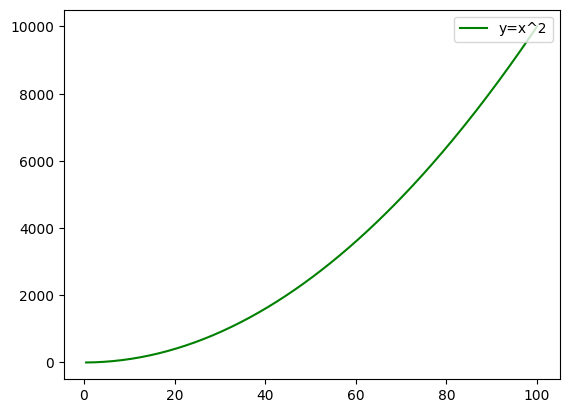

In [16]:
y2 = x*x

plt.plot(x, y2, '-g', label='y=x^2')

plt.legend(loc='upper right')

plt.show()

$y$ $=$ $x^3/100$


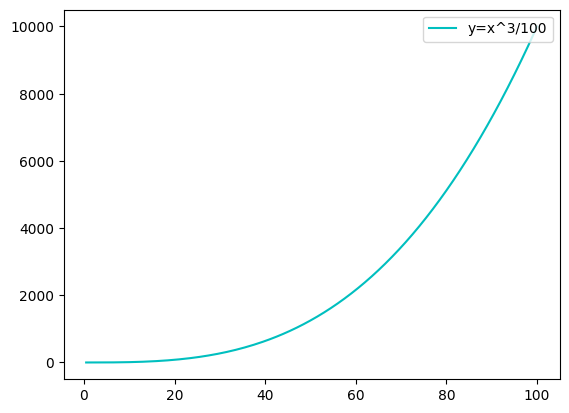

In [17]:

y3 = (x**3)/100

plt.plot(x, y3, '-c', label='y=x^3/100')
plt.legend(loc='upper right')

plt.show()

$y$ $=$ $sin(x)$

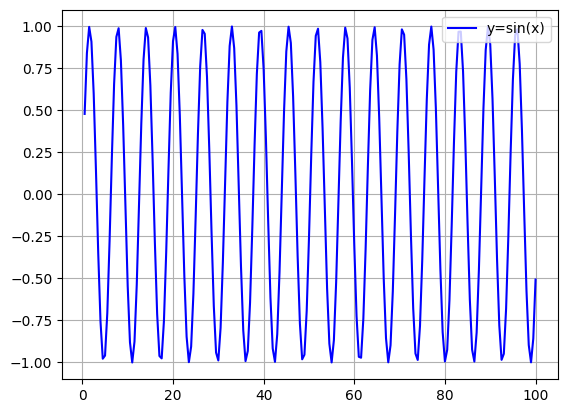

In [18]:
y4 = np.sin(x)

plt.plot(x, y4, '-b', label='y=sin(x)')

plt.legend(loc='upper right')
plt.grid()
plt.show()

$y$ $=$ $sin(x)$$/$$x$

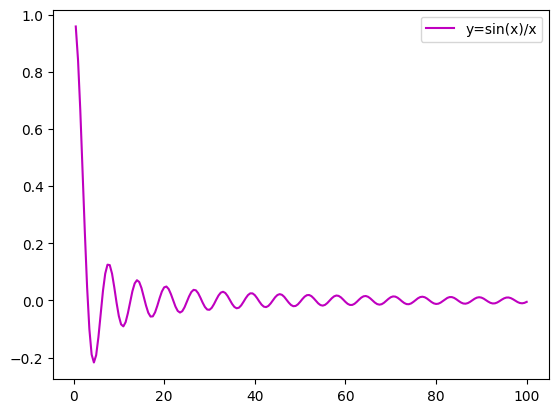

In [19]:

y5 = np.sin(x)/x


plt.plot(x, y5, '-m', label='y=sin(x)/x')

plt.legend(loc='upper right')

plt.show()

$y$ $=$ $log(x)$

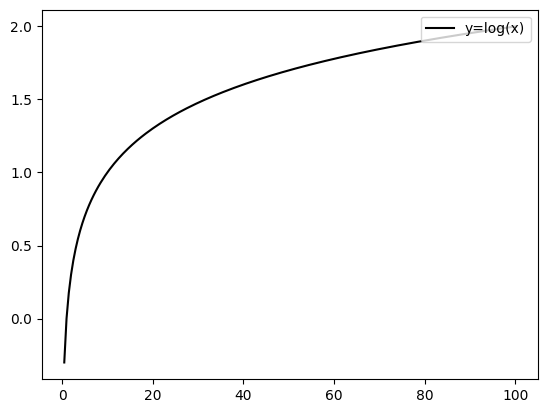

In [20]:

y6 = np.log10(x)

plt.plot(x, y6, '-k', label='y=log(x)')
plt.legend(loc='upper right')

plt.show()

$y$ $=$ $e^x$

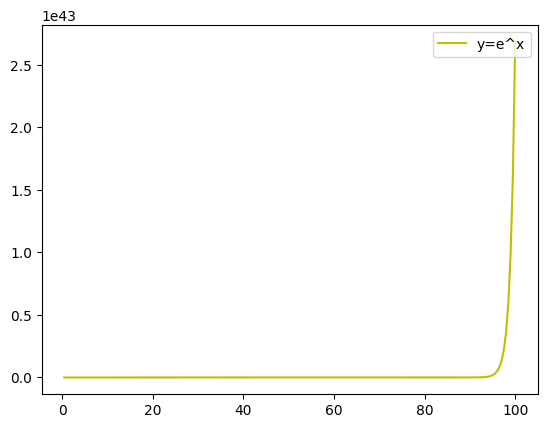

In [21]:
y7 = np.exp(x)
plt.plot(x, y7, '-y', label='y=e^x')
plt.legend(loc='upper right')

plt.show()

Qn10 :

In [22]:
import pandas as pd
import random


data = []

# Generate random values
for i in range(20):
    column = []
    for j in range(5):
        column.append(random.uniform(1.0, 2.0))
    data.append(column)

# Create a DataFrame
df = pd.DataFrame(data, columns=['a', 'b', 'c', 'd', 'e'])
print(df)

# Calculate the standard deviations for each column
std_devs = df.std(axis=0)
max_std_column = std_devs.idxmax()
print("Column with the highest standard deviation: ", max_std_column)

# Calculate the means for each row
row_means = df.mean(axis=1)
min_mean_row = row_means.idxmin()
print("Row with the lowest mean: ", min_mean_row)


           a         b         c         d         e
0   1.832891  1.389477  1.769796  1.946062  1.019532
1   1.880657  1.575690  1.476980  1.942742  1.298613
2   1.389987  1.891642  1.835729  1.538221  1.734634
3   1.799868  1.897811  1.488229  1.272935  1.485642
4   1.388857  1.668874  1.798142  1.724181  1.840506
5   1.919542  1.980722  1.534124  1.906929  1.591893
6   1.663000  1.083947  1.428613  1.866851  1.181729
7   1.260156  1.327353  1.454699  1.337501  1.879640
8   1.278257  1.951204  1.421565  1.834911  1.470307
9   1.749024  1.052086  1.951920  1.224222  1.068618
10  1.957286  1.040258  1.031030  1.247283  1.839229
11  1.621336  1.238545  1.473561  1.114389  1.947757
12  1.465034  1.256244  1.368895  1.605893  1.963735
13  1.718357  1.777792  1.163766  1.311039  1.578685
14  1.928887  1.575797  1.908026  1.375307  1.941471
15  1.198330  1.592098  1.830572  1.242849  1.697193
16  1.301583  1.684259  1.805528  1.796227  1.565933
17  1.041069  1.532745  1.661521  1.068957  1.

Qn 11:
Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [23]:


# Add a new column "f" which is the sum of columns "a", "b", "c", "d", "e"
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

# Create column "g"
df['g'] = df['f'].apply(lambda x: 'LT8' if x < 8 else 'GT8')

# number of rows where the value in column "g" is "LT8"
lt8_count = df[df['g'] == 'LT8'].shape[0]

# standard deviation of column "f" for rows where the value in column "g" is "LT8"
std_lt8 = df[df['g'] == 'LT8']['f'].std()

# standard deviation of column "f" for rows where the value in column "g" is "GT8"
std_gt8 = df[df['g'] == 'GT8']['f'].std()

print("Number of rows where 'g' is 'LT8':", lt8_count)
print("Standard deviation of 'f' where 'g' is 'LT8':", std_lt8)
print("Standard deviation of 'f' where 'g' is 'GT8':", std_gt8)

Number of rows where 'g' is 'LT8': 14
Standard deviation of 'f' where 'g' is 'LT8': 0.39165439811732505
Standard deviation of 'f' where 'g' is 'GT8': 0.3091982228138831


Qn12 : Write a small piece of code to explain broadcasting in numpy.

In [24]:

arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

# Create a 1D array
row_add = np.array([10, 20, 30])

# Perform broadcasting
result = arr + row_add

print("Original Array:")
print(arr)
print("\nArray to be added row-wise:")
print(row_add)
print("\nResult after broadcasting:")
print(result)

Original Array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Array to be added row-wise:
[10 20 30]

Result after broadcasting:
[[11 22 33]
 [14 25 36]
 [17 28 39]]


Qn 13 : Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [25]:
import numpy as np

def custom_argmin(arr):
    min_index = 0
    min_value = arr[0]

    # Iterate through the array to find the index of the minimum element
    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i

    return min_index


array = np.array([5, 3, 8, 2, 9, 1])
custom_argmin_index = custom_argmin(array)

# Verify the result using np.argmin function
numpy_argmin_index = np.argmin(array)

print("Custom argmin result:", custom_argmin_index)
print("Numpy argmin result:", numpy_argmin_index)


Custom argmin result: 5
Numpy argmin result: 5
